# Multivariate Normal Distribution

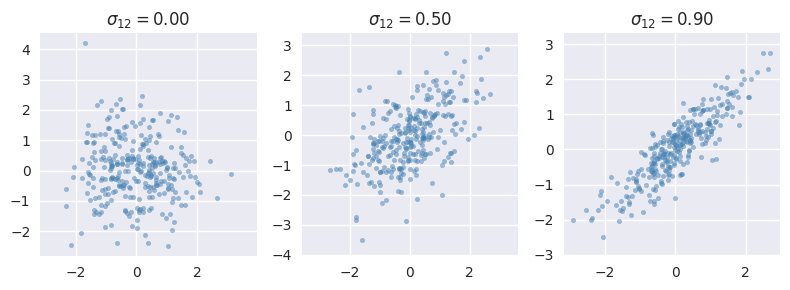

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

plt.style.use("seaborn-v0_8")
mean = [0, 0]
cov12s = [0, 0.5, 0.9]

fig, ax = plt.subplots(1, 3, figsize=(8, 3))

for i, cov12 in enumerate(cov12s):
    cov = [[1, cov12],
           [cov12, 1]]
    x, y = np.random.multivariate_normal(mean, cov, 300).T

    # Plot a scatter plot
    ax[i].scatter(x, y, s=10, color='steelblue', marker='o', alpha=0.5)
    ax[i].set(xlim=(-3, 3), ylim=(-3, 3))
    ax[i].set_title(r"$\sigma_{12}={%.2f}$" % cov12)
    ax[i].axis('equal')
plt.tight_layout()
plt.show()

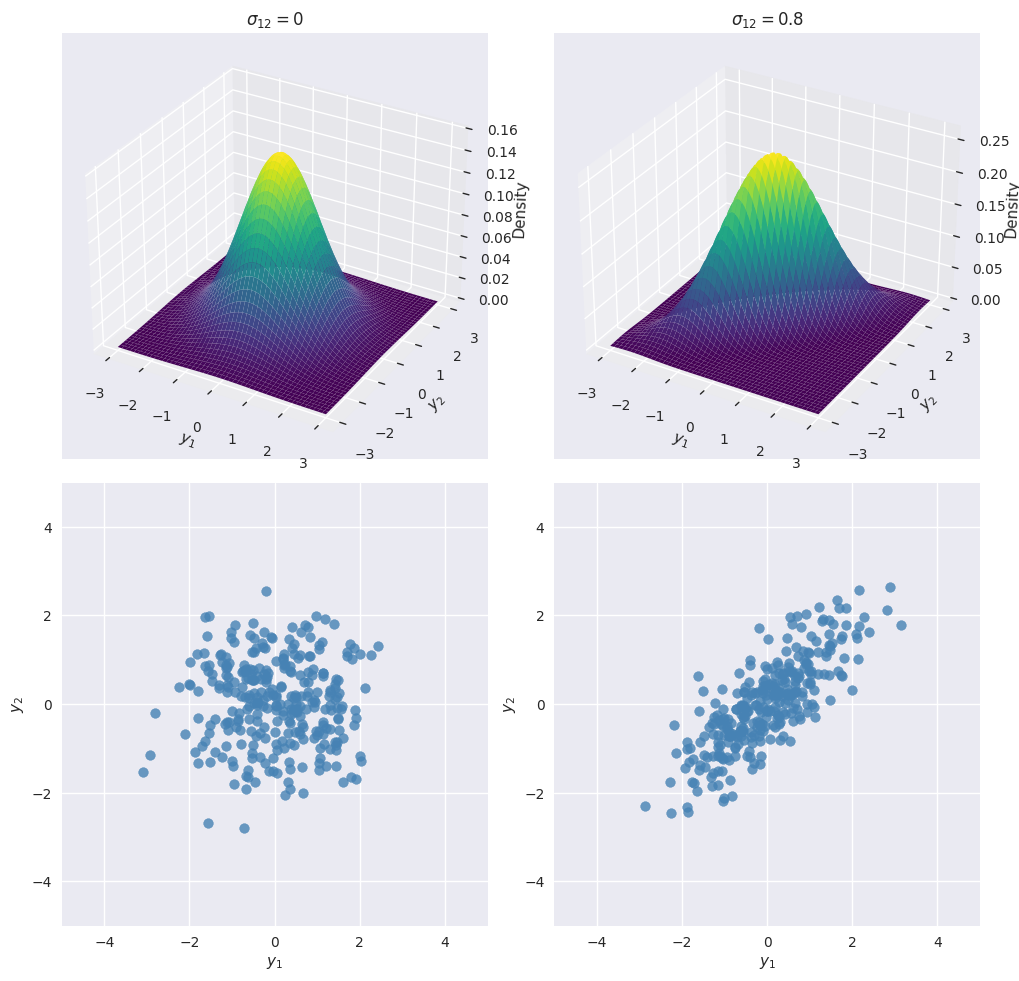

In [2]:
fig = plt.figure(figsize=(10, 10))

# No covariance
# Calculate the probability density function
mean = [0, 0]
cov = [[1, 0], [0, 1]]

x1 = np.linspace(-3, 3, 500)
x2 = np.linspace(-3, 3, 500)
X1, X2 = np.meshgrid(x1, x2)
pos = np.dstack((X1, X2))
rv_00 = multivariate_normal(mean, cov)

# Plot the surface on the top-left subplot
ax = fig.add_subplot(221, projection='3d')
ax.plot_surface(X1, X2, rv_00.pdf(pos), cmap='viridis')

ax.set_xlabel(r'$y_1$')
ax.set_ylabel(r'$y_2$')
ax.set_zlabel('Density')
ax.set_title(r"$\sigma_{12}=0$")

ax = fig.add_subplot(223)

xs = rv_00.rvs(300)
x1, x2 = xs[:, 0], xs[:, 1]
ax.scatter(x1, x2, color='steelblue', marker='o', alpha=0.8)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set(xlabel=r"$y_1$", ylabel=r"$y_2$")

# With covariance
# Calculate the probability density function
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]
rv_08 = multivariate_normal(mean, cov)

# Plot the surface on the top-right subplot
ax = fig.add_subplot(222, projection='3d')

ax.plot_surface(X1, X2, rv_08.pdf(pos), cmap='viridis')

ax.set_xlabel(r'$y_1$')
ax.set_ylabel(r'$y_2$')
ax.set_zlabel('Density')
ax.set_title(r"$\sigma_{12}=0.8$")

ax = fig.add_subplot(224)
xs = rv_08.rvs(300)
x1, x2 = xs[:, 0], xs[:, 1]
ax.scatter(x1, x2, color='steelblue', marker='o', alpha=0.8)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set(xlabel=r"$y_1$", ylabel=r"$y_2$")

plt.tight_layout()
plt.show()

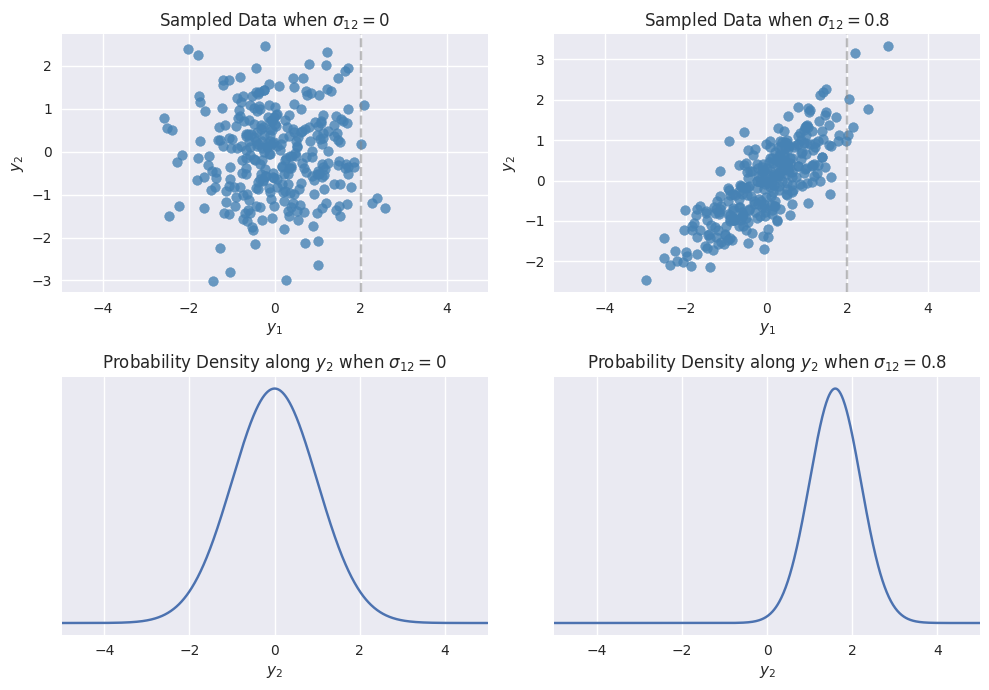

In [3]:
# Plotting the distribution along the y-axis when x = 2

mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]
rv_08 = multivariate_normal(mean, cov)

x1_value = 2
x2 = np.linspace(-5, 5, 1000)
x1_values = np.full(x2.shape, x1_value)
x1x2s = np.dstack((x1_values, x2))
pdf_given_x1_00 = rv_00.pdf(x1x2s)
xs_00 = rv_00.rvs(300)

pdf_given_x1_08 = rv_08.pdf(x1x2s)
xs_08 = rv_08.rvs(300)

fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs[0, 0].scatter(xs_00[:, 0], xs_00[:, 1], color='steelblue', marker='o', alpha=0.8)
axs[0, 0].set_title(r"Sampled Data when $\sigma_{12}=0$")
axs[0, 0].set(xlabel=r"$y_1$", ylabel=r"$y_2$", xlim=[-5, 5], ylim=[-5, 5])
axs[0, 0].axvline(x1_value, linestyle='--', color='gray', alpha=0.5)
axs[0, 0].axis('equal')

axs[0, 1].scatter(xs_08[:, 0], xs_08[:, 1], color='steelblue', marker='o', alpha=0.8)
axs[0, 1].set_title(r"Sampled Data when $\sigma_{12}=0.8$")
axs[0, 1].set(xlabel=r"$y_1$", ylabel=r"$y_2$", xlim=[-5, 5], ylim=[-5, 5])
axs[0, 1].axvline(x1_value, linestyle='--', color='gray', alpha=0.5)
axs[0, 1].axis('equal')

axs[1, 0].plot(x2, pdf_given_x1_00)
axs[1, 0].set_title(r"Probability Density along $y_2$ when $\sigma_{12}=0$")
axs[1, 0].set(xlabel=r"$y_2$", xlim=[-5, 5], yticks=[])

axs[1, 1].plot(x2, pdf_given_x1_08)
axs[1, 1].set_title(r"Probability Density along $y_2$ when $\sigma_{12}=0.8$")
axs[1, 1].set(xlabel=r"$y_2$", xlim=[-5, 5], yticks=[])

plt.tight_layout()
plt.show()


In [4]:
# Find the mode of pdf_given_x1_08
x2[np.argmax(pdf_given_x1_08)]


np.float64(1.596596596596597)

# Sampling Functions

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.style.use("seaborn-v0_8")

In [7]:
def exp_quad_kernel(x1: float, x2: float, length=0.5):
    return np.exp(-(x1 - x2) ** 2 / (2 * length ** 2))


def covariance(x1: np.ndarray, x2: np.ndarray, kernel=exp_quad_kernel):
    assert type(x1) == np.ndarray
    assert type(x2) == np.ndarray
    if len(x1) == len(x2):
        # Calculate a covariance matrix between two vectors
        dim = len(x1)
        g1, g2 = np.meshgrid(x1, x2)
        g1 = g1.reshape(dim * dim, )
        g2 = g2.reshape(dim * dim, )
        cov = kernel(g1, g2)
        return cov.reshape(dim, dim)
    else:
        # Calculate a covariance between a value and a vector
        assert len(x1) == 1 or len(x2) == 1
        return kernel(x1, x2)

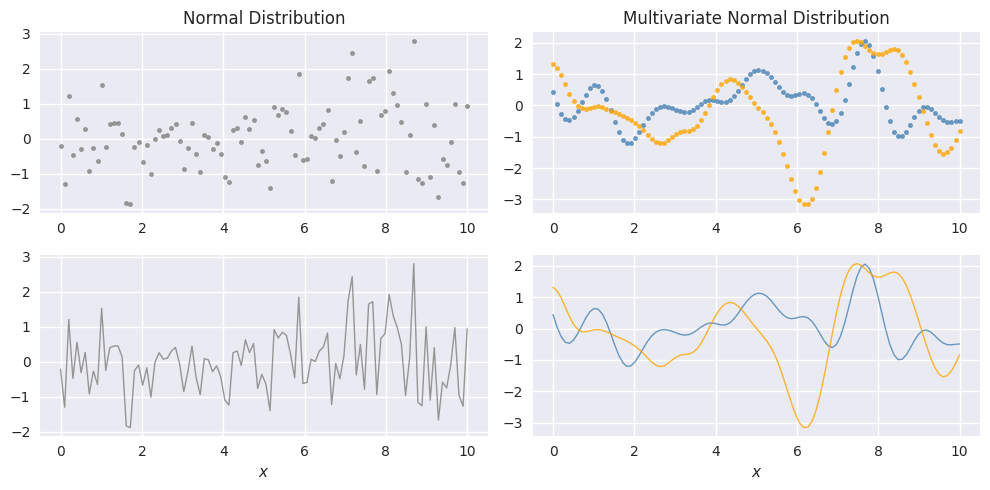

In [8]:
N = 100
x = np.linspace(0, 10, N)
fig, ax = plt.subplots(2, 2, figsize=(10, 5))

# Sample a f(x) over x from a normal distribution
f_norm = stats.norm.rvs(loc=0, scale=1, size=N)

ax[0, 0].scatter(x, f_norm, s=10, color='gray', marker='o', alpha=0.8)
ax[1, 0].plot(x, f_norm, linewidth=1, color='gray', alpha=0.8)
ax[0, 0].set_title("Normal Distribution")
ax[1, 0].set_xlabel(r"$x$")

# Sample a f(x) over x from a multivariate normal distribution
cov = covariance(x, x)
f_mvn = stats.multivariate_normal.rvs(mean=np.zeros(len(x)), cov=cov, size=2).T

# Plot with nice blue
# ax.scatter(x, f_mvn[:,0], linewidth=2, color='steelblue')
ax[0, 1].scatter(x, f_mvn[:, 0], s=10, color='steelblue', marker='o', alpha=0.8)
ax[0, 1].scatter(x, f_mvn[:, 1], s=10, color='orange', marker='o', alpha=0.8)
ax[1, 1].plot(x, f_mvn[:, 0], linewidth=1, color='steelblue', alpha=0.8)
ax[1, 1].plot(x, f_mvn[:, 1], linewidth=1, color='orange', alpha=0.8)
ax[0, 1].set_title("Multivariate Normal Distribution")
ax[1, 1].set_xlabel(r"$x$")
#ax.set_xlim([0, 10])
#ax.set_ylim([-5, 5])

plt.tight_layout()
plt.show()

# Gaussian Process

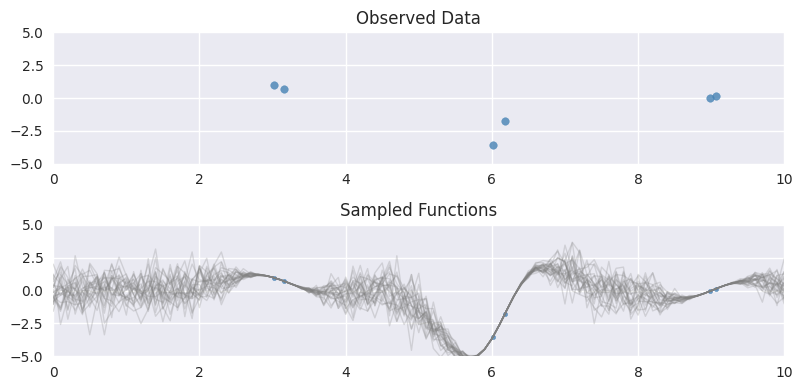

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from numpy.linalg import inv


def sample(x_new, x, y):
    """Sample y_new from a conditional probability p(y_new|x_new, x, y)"""
    K = covariance(x, x)
    k = covariance(x_new, x)
    kss = exp_quad_kernel(x_new, x_new)

    mu = k.T @ inv(K) @ y
    sigma = kss - k.T @ inv(K) @ k
    return stats.norm.rvs(mu, sigma)


# Observed data
y = np.array([0.71, 0.98, -1.75, -3.57, -0.03, 0.15])
x = np.array([3.16, 3.02, 6.18, 6.01, 8.99, 9.07])

# Sample functions conditioned on the observed data and plot it
fig, ax = plt.subplots(2, 1, figsize=(8, 4))
ax[0].scatter(x, y, s=30, color='steelblue', marker='o', alpha=0.8)
ax[1].scatter(x, y, s=10, color='steelblue', marker='o', alpha=0.8)

for i in range(25):
    xs = np.linspace(0, 10, 101)
    fs = []

    for x_new in xs:
        x_new = np.array([x_new])
        y_new = sample(x_new, x, y)
        fs.append(y_new)

    ax[1].plot(xs, fs, linewidth=1, color='gray', alpha=0.25)

ax[0].set(xlim=[0, 10], ylim=[-5, 5])
ax[1].set(xlim=[0, 10], ylim=[-5, 5])
ax[0].set_title("Observed Data")
ax[1].set_title("Sampled Functions")

plt.tight_layout()
plt.show()